In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [27]:
# 데이터 불러오기

df = pd.read_csv('/content/BankChurners.csv')
df = df[df.columns[:-2]]
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## 시각화를 통한 데이터 탐색

In [28]:
# Age

fig = make_subplots(rows=2, cols=1)
tr1 = go.Box(x=df['Customer_Age'], name='Age Box Plot', boxmean='sd')
tr2 = go.Histogram(x=df['Customer_Age'], name='Age Histogram')
fig.add_trace(tr1, row=1, col=1)
fig.add_trace(tr2, row=2, col=1)
fig.update_layout(height=500, width=600, title_text='Distribution of Customer Ages')
fig.show()

In [29]:
# Education & Income

education = pd.DataFrame(df['Education_Level'].value_counts())
labelsedu = df['Education_Level'].unique()
income = pd.DataFrame(df['Income_Category'].value_counts())
labelincome = df['Income_Category'].unique()

# explore education level and income level
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
tr3 = go.Pie(labels=labelsedu, values=education.iloc[:,0], name='proportion of Education Level')
tr4 = go.Pie(labels=labelincome, values=income.iloc[:,0], name='proportion of Different Income Levels')
fig.add_trace(tr3, row=1, col=1)
fig.add_trace(tr4, row=1, col=2)
fig.update_layout(height=500, width=600, title_text="Distribution of Income and Education level")
fig.show()

## PCA

#### 전처리

In [30]:
x = df.iloc[:, 9:21] # assign column 9 to 21 as x variable - the features
x = StandardScaler().fit_transform(x) # standarize the variables
df['Attrition_Flag'].replace('Existing Customer', '1', inplace=True)
df['Attrition_Flag'].replace('Attrited Customer', '0', inplace=True)
y = df['Attrition_Flag'] # assign y variable - the target

### 2 Components

In [31]:
pca = PCA(n_components=2)
PC = pca.fit_transform(x)
principalDF = pd.DataFrame(data=PC, columns=['pc1', 'pc2'])
finalDF = pd.concat([principalDF, df[['Attrition_Flag']]], axis=1)
finalDF.head()

,pc1,pc2,Attrition_Flag
0,0.276048,-0.617639,1
1,-0.612402,1.430502,1
2,-0.613733,1.098632,1
3,-2.499317,1.781346,1
4,-0.560120,0.924119,1


#### 피처의 가중치 확인

In [32]:
PCloadings = pca.components_.T * np.sqrt(pca.explained_variance_)
components = df.columns.tolist()
components = components[9:21]
loadingdf = pd.DataFrame(PCloadings, columns=('PC1', 'PC2'))
loadingdf['variable'] = components
loadingdf

,PC1,PC2,variable
0,-0.012248,-0.084536,Months_on_book
1,-0.276207,-0.384630,Total_Relationship_Count
2,-0.030992,-0.105797,Months_Inactive_12_mon
3,-0.017396,-0.314187,Contacts_Count_12_mon
4,0.867614,-0.180299,Credit_Limit
5,-0.261374,0.402668,Total_Revolving_Bal
6,0.890865,-0.216361,Avg_Open_To_Buy
7,-0.012135,0.181603,Total_Amt_Chng_Q4_Q1
8,0.467479,0.763757,Total_Trans_Amt
9,0.359458,0.788716,Total_Trans_Ct


#### 시각화

In [33]:
fig = ex.scatter(x=loadingdf['PC1'], y=loadingdf['PC2'], text=loadingdf['variable'])
fig.update_layout(
    height=600, width=500,
    title_text='loadings plot')
fig.update_traces(textposition='bottom center')
fig.add_shape(type='line',
              x0=0, y0=-0.5, x1=0, y1=2.5,
              line=dict(color='RoyalBlue', width=3)
              )
fig.add_shape(type='line',
              x0=-1, y0=0, x1=1, y1=0,
              line=dict(color='RoyalBlue', width=3)
              )

fig.show()

- total transaction count, total transaction amount의 가중치가 큼

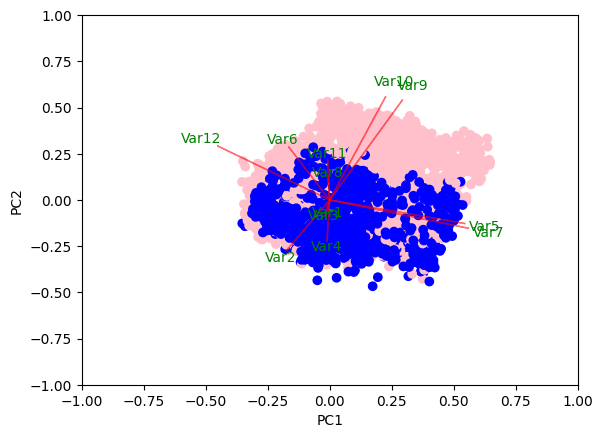

In [34]:
def myplot(score, coeff, labels=None):
  xs = score[:,0]
  ys = score[:,1]
  n = coeff.shape[0]
  scalex = 1.0/(xs.max() - xs.min())
  scaley = 1.0/(ys.max() - ys.min())
  colors = {'1':'pink', '0':'blue'}
  plt.scatter(xs * scalex, ys * scaley, c = y.apply(lambda x:colors[x]))
  for i in range(n):
    plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r', alpha = 0.5)
    if labels is None:
      plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, "Var"+str(i+1), color='g', ha='center', va='center')
    else:
      plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, labels[i], color='g', ha='center', va='center')
  plt.xlim(-1,1)
  plt.ylim(-1,1)
  plt.xlabel("PC{}".format(1))
  plt.ylabel("PC{}".format(2))

myplot(PC[:,0:2], np.transpose(pca.components_[0:2, :]))
plt.show()

#### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Xfinal=finalDf[['pc1','pc2']]
yfinal=finalDf['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(Xfinal,yfinal,test_size=0.3)

logistic=LogisticRegression()
logistic.fit(X=X_train,y=y_train)
logistic.predict(X_test)
score_2=logistic.score(X_test,y_test)

### 3, 4 Components

In [36]:
pca=PCA(n_components=3)
PC=pca.fit_transform(x)

principalDF=pd.DataFrame(data=PC,columns=['pc1','pc2','pc3'])
finalDf = pd.concat([principalDF, df[['Attrition_Flag']]], axis = 1)

Xfinal=finalDf[['pc1','pc2','pc3']]
yfinal=finalDf['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(Xfinal,yfinal,test_size=0.3)

logistic=LogisticRegression()
logistic.fit(X=X_train,y=y_train)
logistic.predict(X_test)
score_3=logistic.score(X_test,y_test)


pca=PCA(n_components=4)
PC=pca.fit_transform(x)

principalDF=pd.DataFrame(data=PC,columns=['pc1','pc2','pc3','pc4'])
finalDf = pd.concat([principalDF, df[['Attrition_Flag']]], axis = 1)

Xfinal=finalDf[['pc1','pc2','pc3','pc4']]
yfinal=finalDf['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(Xfinal,yfinal,test_size=0.3)

logistic=LogisticRegression()
logistic.fit(X=X_train,y=y_train)
logistic.predict(X_test)
score_4=logistic.score(X_test,y_test)

In [37]:
scores=[score_2,score_3,score_4]

In [38]:
ex.bar(y=scores,x=('pc2','pc3','pc4'),range_y=(0.7,0.9),title='PC prediction accuracy')